<h1>....ASSIGNMENT  2....</h1>



---





<h1> NAME : DISHA PARESHKUMAR SUTHAR </h1>
<h1> ROLL_NO : 241110021 </h1>
<h1> PROGRAMME : M.TECH </h1>
<h1> DEPARTMENT : COMPUTER SCIENCE & ENGINEERING </h1>



---


<H1>QUESTION 1</H1>

---



librosa is a python package for music and audio analysis.

It provides the building blocks necessary to create music information retrieval systems.

In [5]:
pip install librosa

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np



---



librosa.load() returns two values:

y: The audio time series, which is a NumPy array containing the amplitude values of the audio signal. This array represents the raw waveform of the audio in the time domain.

For mono audio: y is a 1D array.
For stereo audio: y can be a 2D array where each row corresponds to a different channe
sr: The sample rate of the audio signal, which is an integer value representing the number of samples per second. By default, librosa.load() resamples the audio to a default sample rate of 22,050 Hz (unless specified otherwise).



---



In [8]:
audio_file = '/content/Disha_Audio.mp4'  # Replace with your audio file path
y, sr = librosa.load(audio_file)

<ipython-input-8-024f99f7fc89>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)




---


y=A NumPy array containing the audio signal as a time series. It is the raw waveform of the audio.

sr=The sample rate (in samples per second) of the audio signal. This value tells us how many data points are recorded per second of the audio.


---



y will print out the actual amplitude values of the audio signal as a list of floating-point numbers, ranging between -1 and 1. These values represent the normalized waveform.

The sample rate (sr) will show the frequency at which the audio was sampled, typically 22050 Hz (default in librosa), meaning 22,050 samples per second.

In [9]:
print("shape of y",y.shape) #we have 78557 amplitude values
print()
print("1D numpy array")
print(y)
print()
print("Sample Rate",sr)

shape of y (78557,)

1D numpy array
[ 0.          0.          0.         ... -0.00144497 -0.00134393
 -0.00146734]

Sample Rate 22050




---


librosa.stft(): Computes the Short-Time Fourier Transform (STFT) of the audio signal y. The STFT converts the audio signal from the time domain into the frequency domain, representing how the frequency content of the signal changes over time.
The STFT splits the audio signal into overlapping segments (or windows), performs a Fourier Transform on each segment, and returns a complex-valued matrix where the rows represent frequencies and the columns represent time frames.
np.abs(): Takes the absolute value of the STFT output to get the magnitude of the frequencies (ignoring the phase information).
The result is stored in D, a 2D array where each value represents the magnitude of a specific frequency at a particular time frame.


---





In [10]:
D = np.abs(librosa.stft(y))
print(D)
print("shape of D",D.shape)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.50694347e-03
  3.97531241e-02 9.21893939e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.81098953e-02
  2.39180457e-02 6.19601719e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.06422305e-01
  8.26190710e-02 1.06108010e-01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.54016725e-08
  1.56326321e-04 7.51868181e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.02801136e-08
  1.56224516e-04 7.51671672e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.45789238e-08
  1.56138936e-04 7.51503976e-04]]
shape of D (1025, 154)




---


D is a 2D NumPy array where:
The rows represent different frequency bins.
The columns represent different time frames (or windows) in the audio signal.
Each value in D corresponds to the magnitude of a specific frequency component at a particular time frame, providing information about how the frequency content of the audio signal changes over time.


---



In [11]:
num_rows, num_columns = D.shape

# Print the number of rows and columns
print(f"Number of rows (frequency bins): {num_rows}")
print(f"Number of columns (time frames): {num_columns}")

Number of rows (frequency bins): 1025
Number of columns (time frames): 154


Explaination of librosa.amplitude_to_db(D, ref=np.max):
It converts the magnitude spectrogram D (in terms of amplitude) into decibels (dB), which is a logarithmic scale commonly used in audio processing.
ref=np.max sets the reference value for the conversion. It normalizes the spectrogram such that the maximum amplitude value in D is mapped to 0 dB. This means the highest point in the spectrogram will be at 0 dB, and all other values will be negative, indicating how many dB they are below the peak.

In [12]:
S_db = librosa.amplitude_to_db(D, ref=np.max)

In [13]:
S_db

array([[-80.      , -80.      , -80.      , ..., -80.      , -67.647675,
        -60.341484],
       [-80.      , -80.      , -80.      , ..., -74.47678 , -72.06059 ,
        -63.79285 ],
       [-80.      , -80.      , -80.      , ..., -59.094448, -61.293495,
        -59.12014 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [14]:
S_db.shape

(1025, 154)

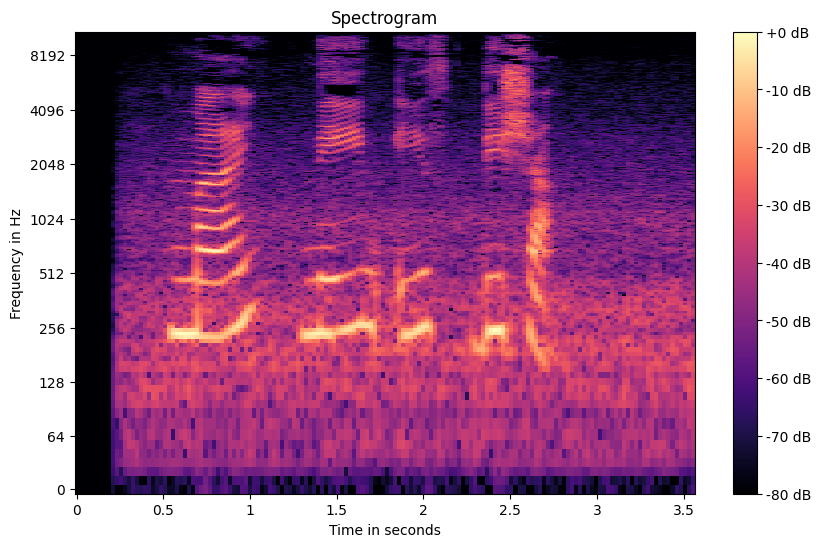

In [17]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time in seconds')
plt.ylabel("Frequency in Hz")
plt.show()


Observing the Spectrogram:
Time Axis (x-axis): Shows how the audio signal evolves over time.
Frequency Axis (y-axis): Represents different frequency components, often displayed on a logarithmic scale to better capture low and high frequencies.
Color Intensity: Indicates the amplitude of each frequency component at each time frame. Brighter colors usually represent higher amplitudes.

What waveshow() does:
It creates a plot of the audio signal over time, showing the amplitude (or intensity) of the signal at each point in time.
The x-axis represents time (in seconds, if the sample rate is provided).
The y-axis represents the amplitude of the waveform. Higher values indicate louder portions, while lower values (closer to 0) represent quieter portions or silence.

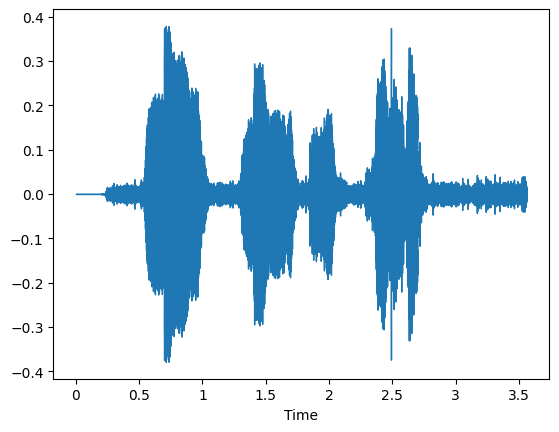

In [16]:
librosa.display.waveshow(y, sr=sr)

Here we can see the wave form. I record "My name is Disha" so for every word I get some peaker intensity and in between them lower intensity due to air pressure



---



---



---



---



---





---

<h1>QUESTION 2 (A) </h1>



---



Here first I am loading my sitting data in csv format. This file contains 5 columns .
 time,gFx(force by x axis), gFy(force by y axis), gFz(force by z axis) and TgF

*   Time in seconds
*   gFx - Force by X axis
*   gFy - Force by Y axis
*   gFz - Force by Z axis
*   Tgf - Net Force by all directions




In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Some Taxonomy of My Files



*   sleep_sleep.csv--> Original Sleeping data without pre processing
*   stand_stand.csv--> Original Standing data without pre processing
*   sit_sit.csv--> Original Sitting data without pre processing
*   test_test.csv--> Original Testing data without pre processing
*   new_sleep.csv-->  Sleeping data with pre processing
*   new_sit.csv--> Sitting data with pre processing
*   new_stand.csv--> Standing data with pre processing
*   test_with_activity.csv--> Resultant File with prediction







---


---




<h2>Sitting Plot</h2>





---


---




Here firstly I plot force of all axis seperatly for better visulization

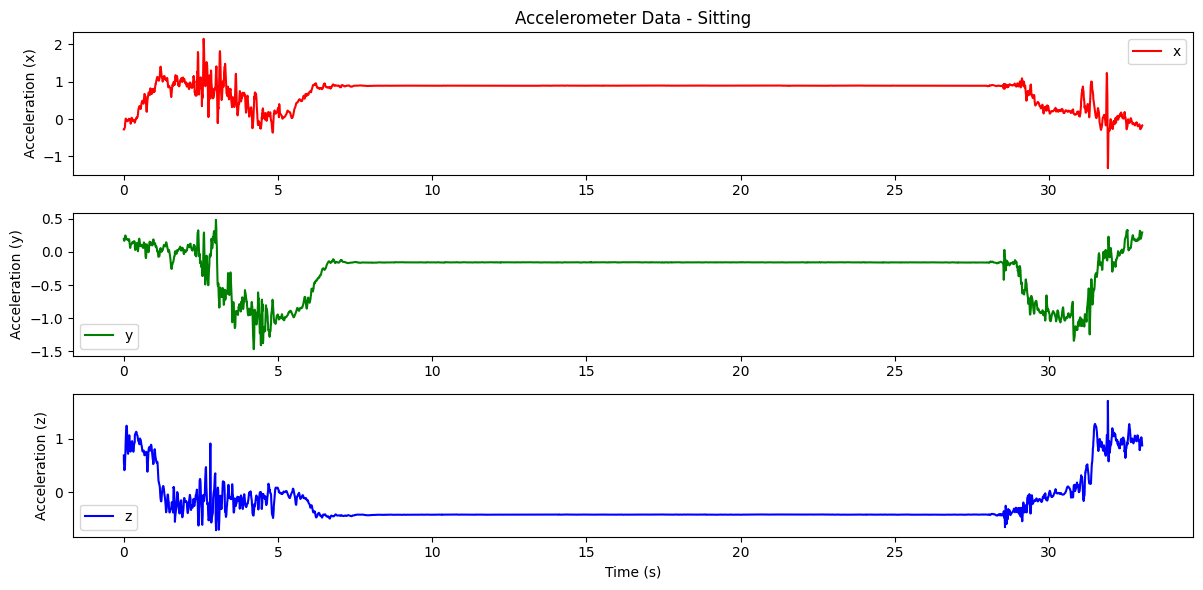

In [19]:
# Load the sitting data from the CSV file
data = pd.read_csv('/content/sit_sit.csv')

# Extract time and column data
time = data['time']
x = data['gFx']
y = data['gFy']
z = data['gFz']

# Plotting the accelerometer data
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(time, x, label='x', color='r')
plt.title('Accelerometer Data - Sitting')
plt.ylabel('Acceleration (x)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, y, label='y', color='g')
plt.ylabel('Acceleration (y)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, z, label='z', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (z)')
plt.legend()

plt.tight_layout()
plt.show()


Here we can see that initially we get too abnormal readings and also at lats. Because when I push start button for reading then I put my phone in my pocket so during that time I got large jerks. Sameway when I remove my phone from pocket and push stop button; I got large jerks at that time also. So we need to trim this abnormal observation. Here I trimmed first 10 seconds till 25 seconds

In [20]:
# Define the time range for trimming (By seeing actual graph we get idea from where to trim till what time)
start_time = 10  # Start time in seconds
end_time = 25   # End time in seconds

# Filter data to include only rows within the specified time range
trimmed_data = data[(data['time'] >= start_time) & (data['time'] <= end_time)]

# Save the trimmed data to a new_sit CSV file
trimmed_data.to_csv('new_sit.csv', index=False)

<h5>Now I plot this preprocessed data with appropriate single plot</h5>

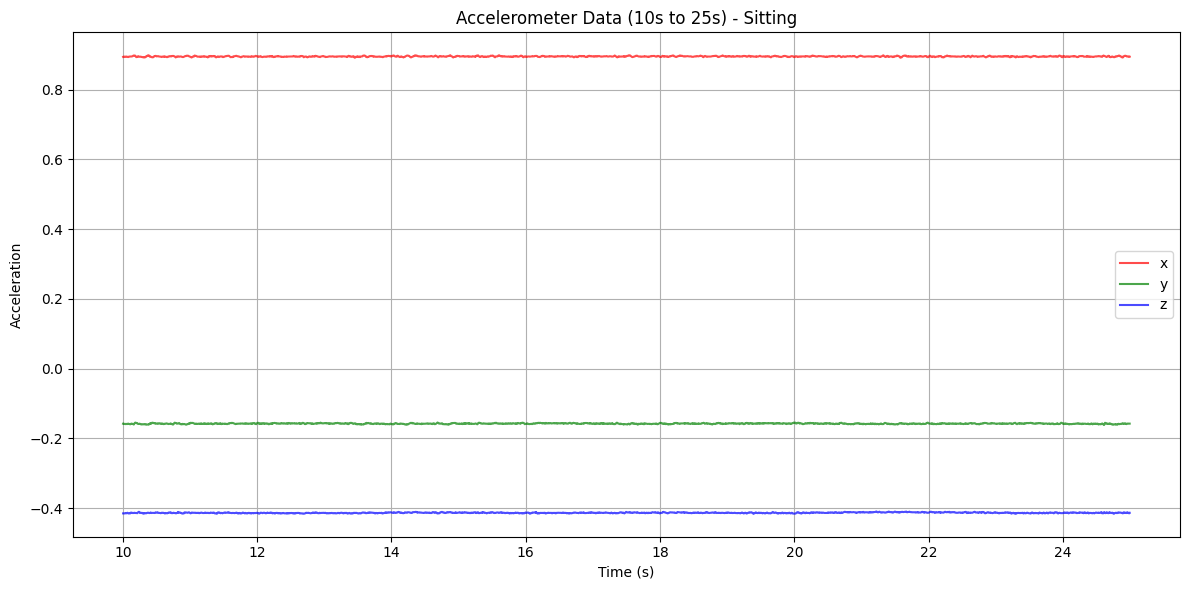

In [21]:
# Filter data to include only rows where time is between start_time and end_time
trimmed_data = data[(data['time'] >= start_time) & (data['time'] <= end_time)]

# Extract time and axis data for trimmed data
time_trimmed = trimmed_data['time']
x_trimmed = trimmed_data['gFx']
y_trimmed = trimmed_data['gFy']
z_trimmed = trimmed_data['gFz']

# Plot the accelerometer data on the same graph
plt.figure(figsize=(12, 6))

plt.plot(time_trimmed, x_trimmed, label='x', color='r', alpha=0.7)
plt.plot(time_trimmed, y_trimmed, label='y', color='g', alpha=0.7)
plt.plot(time_trimmed, z_trimmed, label='z', color='b', alpha=0.7)

plt.title('Accelerometer Data (10s to 25s) - Sitting')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Here I plot some graph of 2 axis's correlation to determine some strong observation by seeing them

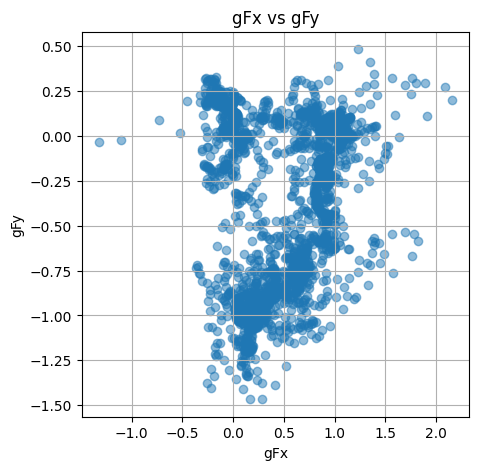

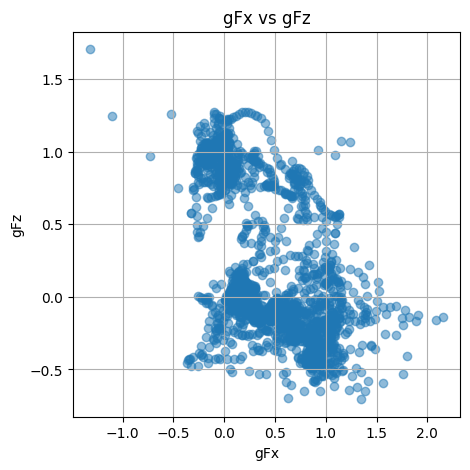

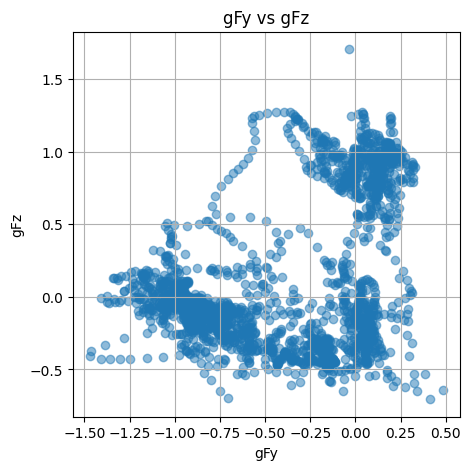

In [22]:
# Plot gFx vs. gFy
plt.figure(figsize=(5, 5))
plt.scatter(data['gFx'], data['gFy'], alpha=0.5)
plt.xlabel('gFx')
plt.ylabel('gFy')
plt.title('gFx vs gFy')
plt.grid(True)
plt.show()

# Plot gFx vs. gFz
plt.figure(figsize=(5, 5))
plt.scatter(data['gFx'], data['gFz'], alpha=0.5)
plt.xlabel('gFx')
plt.ylabel('gFz')
plt.title('gFx vs gFz')
plt.grid(True)
plt.show()

# Plot gFy vs. gFz
plt.figure(figsize=(5, 5))
plt.scatter(data['gFy'], data['gFz'], alpha=0.5)
plt.xlabel('gFy')
plt.ylabel('gFz')
plt.title('gFy vs gFz')
plt.grid(True)
plt.show()


 Observation:

 When sitting, the vertical force (gFz) is usually the largest component compared to the horizontal forces (gFx and gFy). This is because the majority of the body weight is supported vertically by the chair or surface.
High gFz values and relatively lower gFx and gFy values can indicate a sitting posture.



---



---


<h2>Sleeping Plot</h2>

---



---



Same preprocessing and plotting done on sleeping posture as discussed above

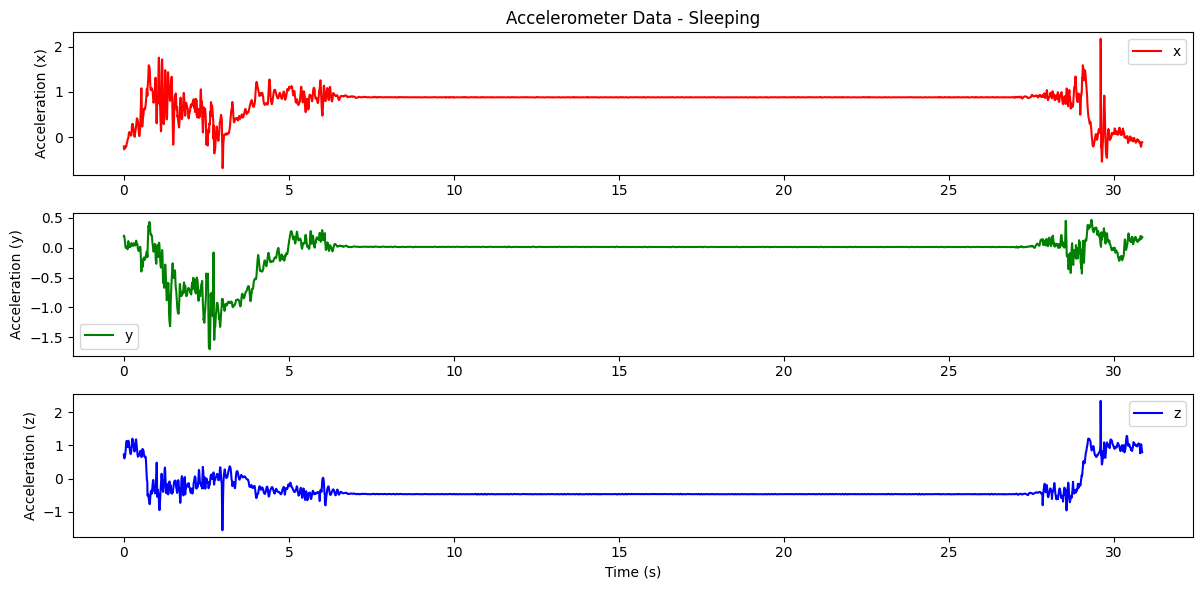

In [23]:
data = pd.read_csv('/content/sleep_sleep.csv')

time = data['time']
x = data['gFx']
y = data['gFy']
z = data['gFz']

# Plot the accelerometer data
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(time, x, label='x', color='r')
plt.title('Accelerometer Data - Sleeping')
plt.ylabel('Acceleration (x)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, y, label='y', color='g')
plt.ylabel('Acceleration (y)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, z, label='z', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (z)')
plt.legend()

plt.tight_layout()
plt.show()


Here we can see that initially we get too abnormal readings and also at lats. Because when I push start button for reading then I put my phone in my pocket so during that time I got large jerks. Then I sleep.Sameway when I remove my phone from pocket and push stop button; I got large jerks at that time also. So we need to trim this abnormal observation. Here I trimmed first 10 seconds till 25 seconds

In [24]:
start_time = 10  # Start time in seconds
end_time = 25   # End time in seconds

# Filter data to include only rows within the specified time range
trimmed_data = data[(data['time'] >= start_time) & (data['time'] <= end_time)]

# Save the trimmed data to a new CSV file
trimmed_data.to_csv('new_sleep.csv', index=False)  # Preprocessed file saved in another new file name new_sleep.csv

Plotting preprocessed file in single plot

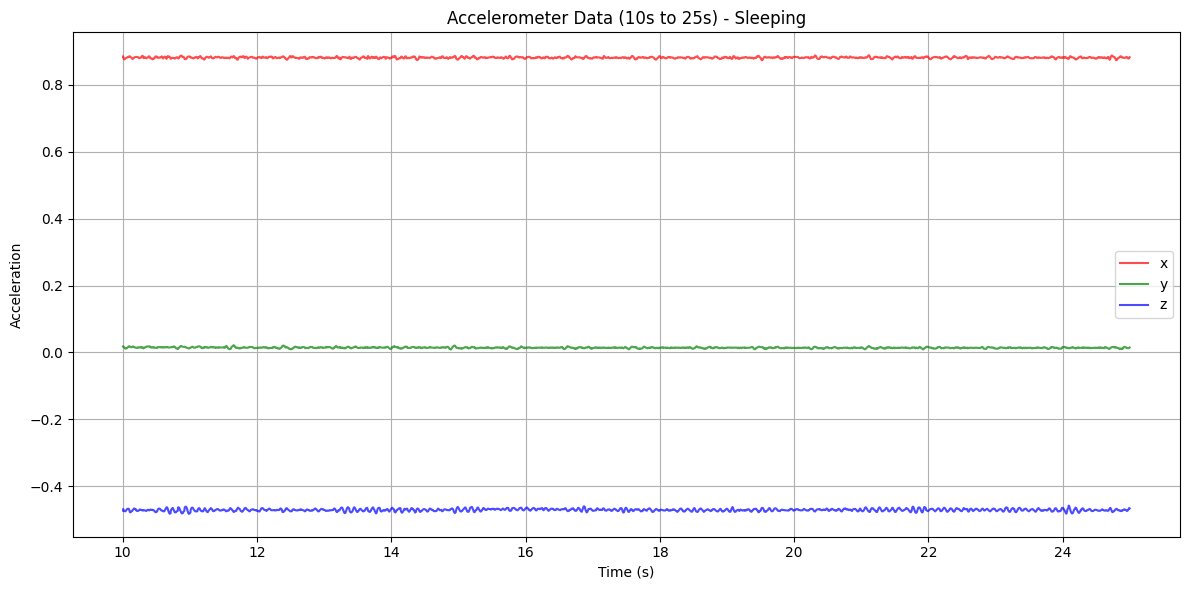

In [25]:
# Filter data to include only rows where time is between start_time and end_time
trimmed_data = data[(data['time'] >= start_time) & (data['time'] <= end_time)]

# Extract time and axis data for trimmed data
time_trimmed = trimmed_data['time']
x_trimmed = trimmed_data['gFx']
y_trimmed = trimmed_data['gFy']
z_trimmed = trimmed_data['gFz']

# Plot the accelerometer data on the same graph
plt.figure(figsize=(12, 6))

plt.plot(time_trimmed, x_trimmed, label='x', color='r', alpha=0.7)
plt.plot(time_trimmed, y_trimmed, label='y', color='g', alpha=0.7)
plt.plot(time_trimmed, z_trimmed, label='z', color='b', alpha=0.7)

plt.title('Accelerometer Data (10s to 25s) - Sleeping')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


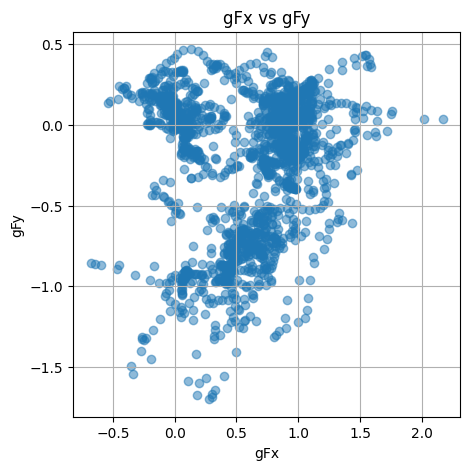

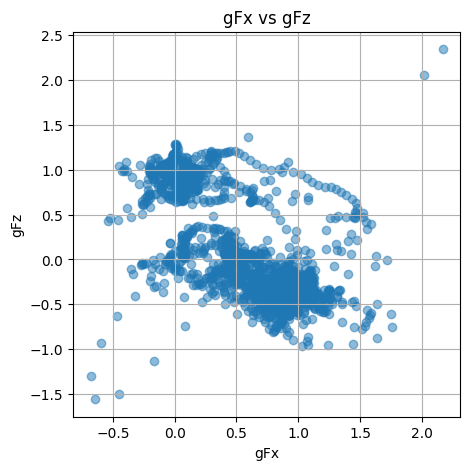

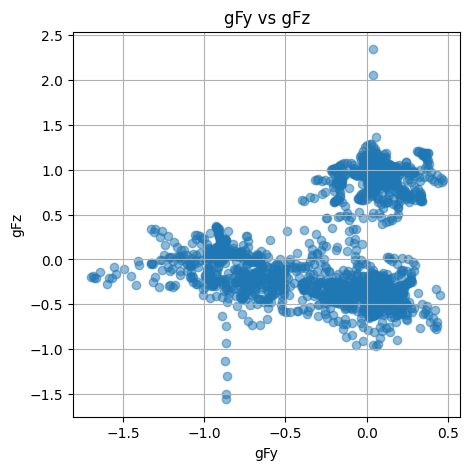

In [26]:
# Plot gFx vs. gFy
plt.figure(figsize=(5, 5))
plt.scatter(data['gFx'], data['gFy'], alpha=0.5)
plt.xlabel('gFx')
plt.ylabel('gFy')
plt.title('gFx vs gFy')
plt.grid(True)
plt.show()

# Plot gFx vs. gFz
plt.figure(figsize=(5, 5))
plt.scatter(data['gFx'], data['gFz'], alpha=0.5)
plt.xlabel('gFx')
plt.ylabel('gFz')
plt.title('gFx vs gFz')
plt.grid(True)
plt.show()

# Plot gFy vs. gFz
plt.figure(figsize=(5, 5))
plt.scatter(data['gFy'], data['gFz'], alpha=0.5)
plt.xlabel('gFy')
plt.ylabel('gFz')
plt.title('gFy vs gFz')
plt.grid(True)
plt.show()


Obseravtion:

When lying flat (sleeping), the force is more evenly distributed across the three axes (gFx, gFy, and gFz) compared to sitting, where gFz (the vertical axis) is dominant.
The gFx and gFy values may be larger than when sitting because the body is aligned more horizontally. The gFz component might be reduced compared to sitting, depending on the orientation of the body.



---



---




<h2>Standing Position</h2>


---


---




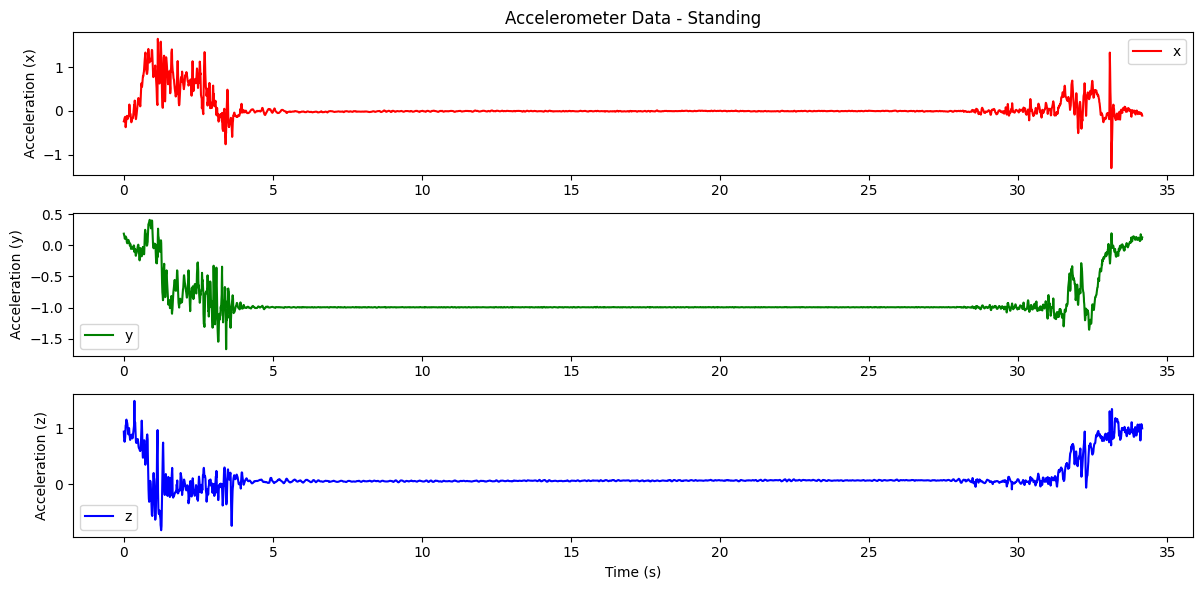

In [27]:
# Load the data from the CSV file
data = pd.read_csv('/content/stand_stand.csv')

#same steps as discussed abobve in two positions
time = data['time']
x = data['gFx']
y = data['gFy']
z = data['gFz']

# Plot the accelerometer data
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(time, x, label='x', color='r')
plt.title('Accelerometer Data - Standing')
plt.ylabel('Acceleration (x)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, y, label='y', color='g')
plt.ylabel('Acceleration (y)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, z, label='z', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (z)')
plt.legend()

plt.tight_layout()
plt.show()


Preprocessing and trimming of abnormal readings

In [28]:
# Define the time range for trimming
start_time = 10  # Start time in seconds
end_time = 25   # End time in seconds

# Filter data to include only rows within the specified time range
trimmed_data = data[(data['time'] >= start_time) & (data['time'] <= end_time)]

# Save the trimmed data to a new CSV file
trimmed_data.to_csv('new_stand.csv', index=False)  #

Plotting preprocessed plot in single one

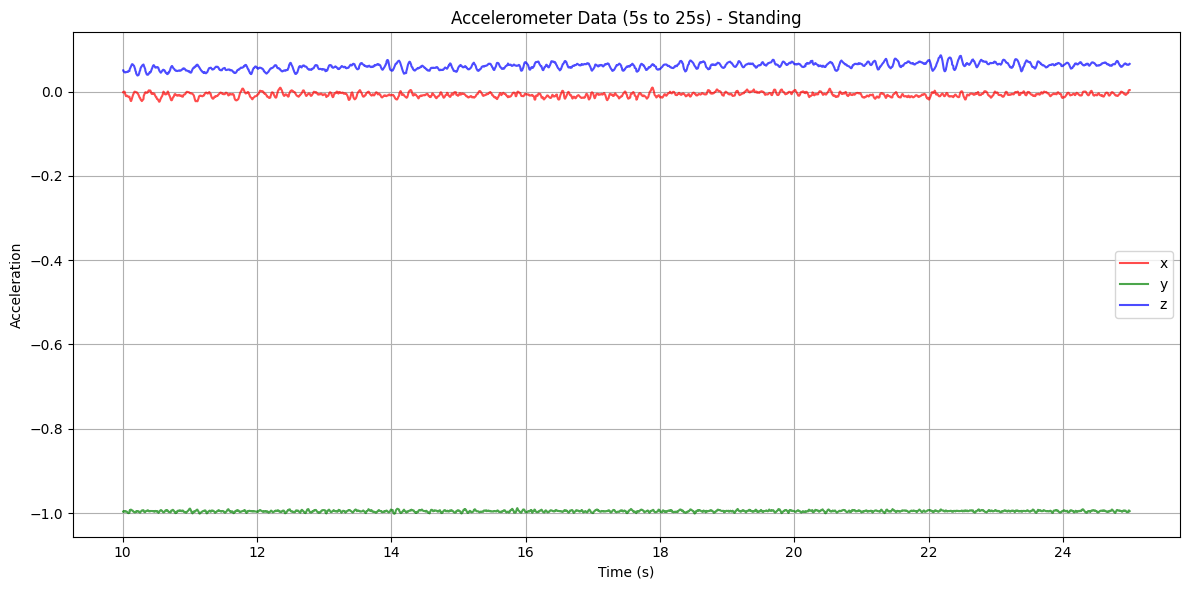

In [29]:
# Filter data to include only rows where time is between start_time and end_time
trimmed_data = data[(data['time'] >= start_time) & (data['time'] <= end_time)]

# Extract time and axis data for trimmed data
time_trimmed = trimmed_data['time']
x_trimmed = trimmed_data['gFx']
y_trimmed = trimmed_data['gFy']
z_trimmed = trimmed_data['gFz']

# Plot the accelerometer data on the same graph
plt.figure(figsize=(12, 6))

plt.plot(time_trimmed, x_trimmed, label='x', color='r', alpha=0.7)
plt.plot(time_trimmed, y_trimmed, label='y', color='g', alpha=0.7)
plt.plot(time_trimmed, z_trimmed, label='z', color='b', alpha=0.7)

plt.title('Accelerometer Data (10s to 25s) - Standing')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


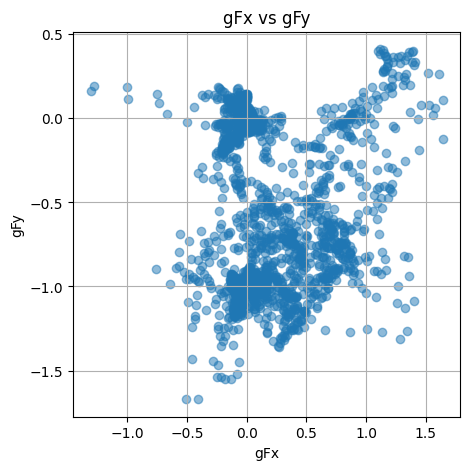

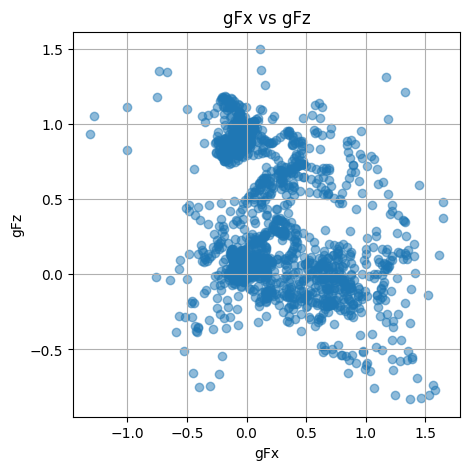

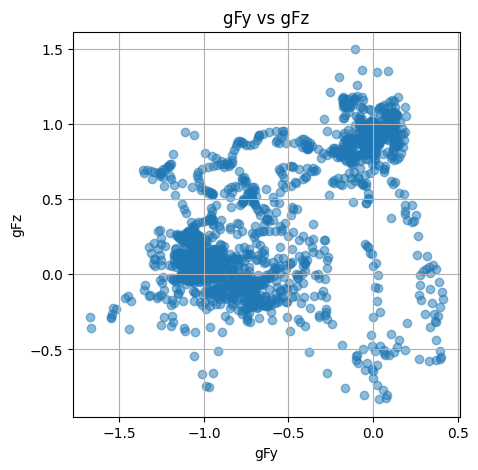

In [30]:
# Plot gFx vs. gFy
plt.figure(figsize=(5, 5))
plt.scatter(data['gFx'], data['gFy'], alpha=0.5)
plt.xlabel('gFx')
plt.ylabel('gFy')
plt.title('gFx vs gFy')
plt.grid(True)
plt.show()

# Plot gFx vs. gFz
plt.figure(figsize=(5, 5))
plt.scatter(data['gFx'], data['gFz'], alpha=0.5)
plt.xlabel('gFx')
plt.ylabel('gFz')
plt.title('gFx vs gFz')
plt.grid(True)
plt.show()

# Plot gFy vs. gFz
plt.figure(figsize=(5, 5))
plt.scatter(data['gFy'], data['gFz'], alpha=0.5)
plt.xlabel('gFy')
plt.ylabel('gFz')
plt.title('gFy vs gFz')
plt.grid(True)
plt.show()


Observation:

In a stable standing position, the forces along the horizontal axes (gFx and gFy) will be minimal because there is little horizontal movement.
Low values for both gFx and gFy, combined with high gFz, indicate a standing posture with little to no movement in the horizontal directions.



---


<h1>QUESTION 2 (B)</h1>


---



In this question, first I took preprocessed files of sleeping, standing and sitting position. Then I calculate mean of force of every direction. I did this fpr these three activites. Now I took each datapoint from test dataset who has 3 values; gFx, gFy, gFz. Then I calculate euclidean distance between test data point and standing mean coordinates. Also calculate euclidean distance between new data point and sitting mean coorddinate. Then calculate euclidean between new data point and sleeping mean coordinate. Whichever euclidean distance is minimum ; we will predict our new data point from that activity. This is also called "Learning With Prototype" (LwP) model. In this for every class(Here activity) we have class prototype vector.

In [31]:
# Load the sleeping  file into a DataFrame
df1 = pd.read_csv('/content/new_sleep.csv')

# Calculate the mean of the x axis force, y axis force and z axis force
mean_x_sleep = df1['gFx'].mean()
mean_y_sleep = df1['gFy'].mean()
mean_z_sleep = df1['gFz'].mean()

# Load the standing file into a DataFrame
df2 = pd.read_csv('/content/new_stand.csv')

# Calculate the mean of the x axis force, y axis force and z axis force
mean_x_stand = df2['gFx'].mean()
mean_y_stand = df2['gFy'].mean()
mean_z_stand = df2['gFz'].mean()

# Load the sitting file into a DataFrame
df3 = pd.read_csv('/content/new_sit.csv')

# Calculate the mean of the x axis force, y axis force and z axis force
mean_x_sit = df3['gFx'].mean()
mean_y_sit = df3['gFy'].mean()
mean_z_sit = df3['gFz'].mean()

In [32]:
# Load the testing file into a DataFrame
df = pd.read_csv('/content/test _test.csv')

# Calculate the Euclidean distance from each point to the sitting reference
dist_sit = np.sqrt((df['gFx'] - mean_x_sit)**2 + (df['gFy'] - mean_y_sit)**2 + (df['gFz'] - mean_z_sit)**2)

# Calculate the Euclidean distance from each point to the sleeping reference
dist_sleep = np.sqrt((df['gFx'] - mean_x_sleep)**2 + (df['gFy'] - mean_y_sleep)**2 + (df['gFz'] - mean_z_sleep)**2)

# Calculate the Euclidean distance from each point to the standing reference
dist_stand = np.sqrt((df['gFx'] - mean_x_stand)**2 + (df['gFy'] - mean_y_stand)**2 + (df['gFz'] - mean_z_stand)**2)

# Find the minimum distance among the three reference points for each data point
df['distance'] = np.minimum(np.minimum(dist_sit, dist_sleep), dist_stand)

#by seeing abnormal readings and its distance to particular class; we can set threshold pd.value_counts
#here I set my distance threshold as 1

df['Activity'] = np.where(df['distance'] >= 1, 'No pattern',
                          np.where(dist_sit == np.minimum(np.minimum(dist_sit, dist_sleep), dist_stand), 'sitting',
                                   np.where(dist_sleep == np.minimum(np.minimum(dist_sit, dist_sleep), dist_stand), 'sleeping', 'standing')))

# Print the DataFrame with distances
print(df)


           time     gFx     gFy     gFz    TgF  distance    Activity
0      0.000958 -0.1994  0.3342  0.7658  0.859  1.517314  No pattern
1      0.001432 -0.2065  0.3063  0.7240  0.813  1.474588  No pattern
2      0.006320 -0.2131  0.2793  0.7052  0.788  1.443237  No pattern
3      0.011142 -0.2126  0.2611  0.7096  0.785  1.429107  No pattern
4      0.016170 -0.2146  0.2482  0.7304  0.801  1.427706  No pattern
...         ...     ...     ...     ...    ...       ...         ...
5261  26.206754 -0.2360  0.2446  0.8650  0.929  1.495706  No pattern
5262  26.207154 -0.2376  0.2614  0.8501  0.921  1.502024  No pattern
5263  26.217329 -0.2419  0.2802  0.8471  0.924  1.516893  No pattern
5264  26.217848 -0.2478  0.2942  0.8479  0.931  1.530015  No pattern
5265  26.221429 -0.2551  0.2974  0.8482  0.934  1.534031  No pattern

[5266 rows x 7 columns]


Adding two new columns into our result

In [33]:
# Load the test CSV file
df_test = pd.read_csv('/content/test _test.csv')  # Replace with the path to your test file

# Ensure both DataFrames have the same number of rows or align them appropriately
if len(df_test) != len(df):
    raise ValueError("The number of rows in the test file and the file with labels do not match.")

# Add the 'Activity' column to the test DataFrame
df_test['Activity'] = df['Activity']
df_test['Distance'] =df['distance']

# Save the modified test DataFrame with the Activity Column and Distance column
df_test.to_csv('/content/test_with_activity.csv', index=False)

Plotting Testing Dataset

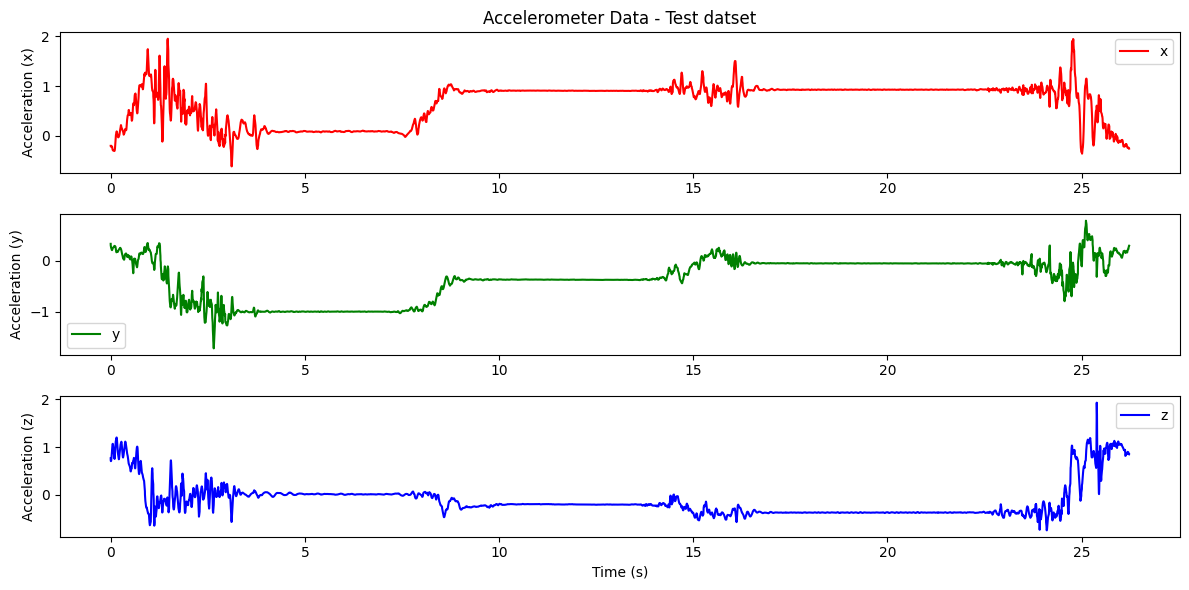

In [34]:
data = pd.read_csv('/content/test _test.csv')


time = data['time']
x = data['gFx']
y = data['gFy']
z = data['gFz']

# Plot the accelerometer data
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(time, x, label='x', color='r')
plt.title('Accelerometer Data - Test datset')
plt.ylabel('Acceleration (x)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, y, label='y', color='g')
plt.ylabel('Acceleration (y)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, z, label='z', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (z)')
plt.legend()

plt.tight_layout()
plt.show()


Plotting test dataset in single plot

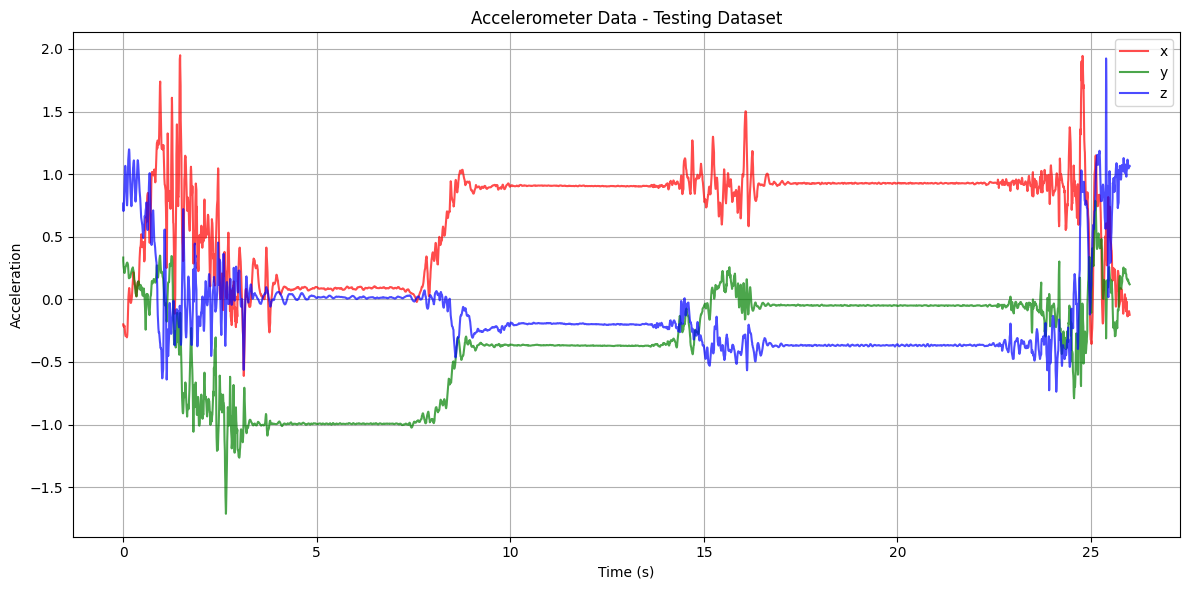

In [35]:
#No need to trim now because we want to detect actual pattern
start_time = 0  # Start time in seconds
end_time = 26   # End time in seconds

# Filter data to include only rows where time is between start_time and end_time
trimmed_data = data[(data['time'] >= start_time) & (data['time'] <= end_time)]

# Extract time and axis data for trimmed data
time_trimmed = trimmed_data['time']
x_trimmed = trimmed_data['gFx']
y_trimmed = trimmed_data['gFy']
z_trimmed = trimmed_data['gFz']

# Plot the accelerometer data on the same graph
plt.figure(figsize=(12, 6))

plt.plot(time_trimmed, x_trimmed, label='x', color='r', alpha=0.7)
plt.plot(time_trimmed, y_trimmed, label='y', color='g', alpha=0.7)
plt.plot(time_trimmed, z_trimmed, label='z', color='b', alpha=0.7)

plt.title('Accelerometer Data - Testing Dataset')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/test_with_activity.csv')

# Print the entire DataFrame
print(df)


           time     gFx     gFy     gFz    TgF    Activity  Distance
0      0.000958 -0.1994  0.3342  0.7658  0.859  No pattern  1.517314
1      0.001432 -0.2065  0.3063  0.7240  0.813  No pattern  1.474588
2      0.006320 -0.2131  0.2793  0.7052  0.788  No pattern  1.443237
3      0.011142 -0.2126  0.2611  0.7096  0.785  No pattern  1.429107
4      0.016170 -0.2146  0.2482  0.7304  0.801  No pattern  1.427706
5      0.020988 -0.2199  0.2323  0.7702  0.834  No pattern  1.433934
6      0.026042 -0.2170  0.2196  0.8235  0.879  No pattern  1.449960
7      0.030928 -0.2094  0.2125  0.8806  0.930  No pattern  1.473911
8      0.036026 -0.2155  0.2111  0.9412  0.988  No pattern  1.508171
9      0.040812 -0.2385  0.2189  0.9991  1.050  No pattern  1.552062
10     0.046061 -0.2617  0.2318  1.0421  1.099  No pattern  1.591924
11     0.050779 -0.2771  0.2443  1.0648  1.127  No pattern  1.618089
12     0.055822 -0.2879  0.2543  1.0665  1.134  No pattern  1.628642
13     0.060751 -0.2926  0.2597  1

I just plot our final resultant csv file in nice tabular form

In [37]:
from IPython.display import display

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/test_with_activity.csv')

# Display the entire DataFrame in a table format
display(df)


time     gFx     gFy     gFz    TgF    Activity  Distance
0      0.000958 -0.1994  0.3342  0.7658  0.859  No pattern  1.517314
1      0.001432 -0.2065  0.3063  0.7240  0.813  No pattern  1.474588
2      0.006320 -0.2131  0.2793  0.7052  0.788  No pattern  1.443237
3      0.011142 -0.2126  0.2611  0.7096  0.785  No pattern  1.429107
4      0.016170 -0.2146  0.2482  0.7304  0.801  No pattern  1.427706
5      0.020988 -0.2199  0.2323  0.7702  0.834  No pattern  1.433934
6      0.026042 -0.2170  0.2196  0.8235  0.879  No pattern  1.449960
7      0.030928 -0.2094  0.2125  0.8806  0.930  No pattern  1.473911
8      0.036026 -0.2155  0.2111  0.9412  0.988  No pattern  1.508171
9      0.040812 -0.2385  0.2189  0.9991  1.050  No pattern  1.552062
10     0.046061 -0.2617  0.2318  1.0421  1.099  No pattern  1.591924
11     0.050779 -0.2771  0.2443  1.0648  1.127  No pattern  1.618089
12     0.055822 -0.2879  0.2543  1.0665  1.134  No pattern  1.628642
13     0.060751 -0.2926  0.2597  1.0469  1.118  No pattern  1.621611
14     0.065861 -0.2915  0.2619  1.0120  1.085  No pattern  1.602157
15     0.070926 -0.2889  0.2648  0.9707  1.047  No pattern  1.579831
16     0.075742 -0.2893  0.2690  0.9300  1.010  No pattern  1.560219
17     0.080724 -0.2933  0.2758  0.8869  0.974  No pattern  1.542960
18     0.085848 -0.2977  0.2832  0.8396  0.935  No pattern  1.525194
19     0.090791 -0.3022  0.2875  0.7937  0.897  No pattern  1.506810
20     0.096021 -0.3033  0.2909  0.7599  0.868  No pattern  1.493806
21     0.100802 -0.2977  0.2937  0.7509  0.859  No pattern  1.490932
22     0.105765 -0.2849  0.2937  0.7814  0.882  No pattern  1.502874
23     0.110759 -0.2558  0.2909  0.8498  0.934  No pattern  1.529495
24     0.115598 -0.2018  0.2858  0.9339  0.997  No pattern  1.562722
25     0.120857 -0.1337  0.2812  1.0145  1.061  No pattern  1.598653
26     0.125535 -0.0695  0.2702  1.0758  1.111  No pattern  1.623658
27     0.130602 -0.0201  0.2453  1.1130  1.140  No pattern  1.626968
28     0.135434  0.0167  0.2123  1.1376  1.157  No pattern  1.618328
29     0.140494  0.0424  0.1852  1.1599  1.175  No pattern  1.613897
30     0.145554  0.0631  0.1710  1.1813  1.195  No pattern  1.619046
31     0.150448  0.0821  0.1686  1.1982  1.213  No pattern  1.630000
32     0.155537  0.0907  0.1732  1.1969  1.213  No pattern  1.632875
33     0.160481  0.0800  0.1793  1.1701  1.186  No pattern  1.618154
34     0.165421  0.0597  0.1812  1.1215  1.138  No pattern  1.585654
35     0.170441  0.0387  0.1793  1.0606  1.076  No pattern  1.543366
36     0.175491  0.0159  0.1759  0.9957  1.011  No pattern  1.498955
37     0.181737 -0.0045  0.1754  0.9348  0.951  No pattern  1.461167
38     0.185516 -0.0191  0.1817  0.8860  0.905  No pattern  1.437711
39     0.190323 -0.0255  0.1917  0.8533  0.875  No pattern  1.427568
40     0.195318 -0.0287  0.2010  0.8232  0.848  No pattern  1.418958
41     0.200353 -0.0277  0.2074  0.7900  0.817  No pattern  1.406851
42     0.205621 -0.0224  0.2140  0.7599  0.790  No pattern  1.397127
43     0.210356 -0.0145  0.2199  0.7441  0.776  No pattern  1.394362
44     0.215160 -0.0033  0.2243  0.7489  0.782  No pattern  1.400536
45     0.220207  0.0071  0.2304  0.7836  0.817  No pattern  1.423225
46     0.225122  0.0213  0.2374  0.8315  0.865  No pattern  1.454279
47     0.230427  0.0521  0.2404  0.8721  0.906  No pattern  1.479615
48     0.235069  0.0881  0.2387  0.9085  0.943  No pattern  1.500335
49     0.240143  0.1142  0.2397  0.9512  0.988  No pattern  1.527528
50     0.245242  0.1254  0.2543  1.0010  1.040  No pattern  1.569597
51     0.250065  0.1429  0.2555  1.0352  1.076  No pattern  1.592815
52     0.255483  0.1689  0.2438  1.0506  1.092  No pattern  1.595821
53     0.260279  0.1962  0.2341  1.0643  1.107  No pattern  1.600111
54     0.265120  0.2172  0.2316  1.0895  1.135  No pattern  1.616912
55     0.270118  0.2018  0.2218  1.1000  1.140  No pattern  1.614154
56     0.275663  0.1711  0.2059  1.1100  1.142  No pattern  1.605006
57     0.

Displaying Activity with time

In [38]:
from IPython.display import display

# Set pandas options to display all rows and columns (if needed)
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/test_with_activity.csv')

# Select only the 'Activity' and 'Time' columns
df_selected = df[['time', 'Activity']]

# Display the selected columns in a table format
display(df_selected)


time    Activity
0      0.000958  No pattern
1      0.001432  No pattern
2      0.006320  No pattern
3      0.011142  No pattern
4      0.016170  No pattern
5      0.020988  No pattern
6      0.026042  No pattern
7      0.030928  No pattern
8      0.036026  No pattern
9      0.040812  No pattern
10     0.046061  No pattern
11     0.050779  No pattern
12     0.055822  No pattern
13     0.060751  No pattern
14     0.065861  No pattern
15     0.070926  No pattern
16     0.075742  No pattern
17     0.080724  No pattern
18     0.085848  No pattern
19     0.090791  No pattern
20     0.096021  No pattern
21     0.100802  No pattern
22     0.105765  No pattern
23     0.110759  No pattern
24     0.115598  No pattern
25     0.120857  No pattern
26     0.125535  No pattern
27     0.130602  No pattern
28     0.135434  No pattern
29     0.140494  No pattern
30     0.145554  No pattern
31     0.150448  No pattern
32     0.155537  No pattern
33     0.160481  No pattern
34     0.165421  No pattern
35     0.170441  No pattern
36     0.175491  No pattern
37     0.181737  No pattern
38     0.185516  No pattern
39     0.190323  No pattern
40     0.195318  No pattern
41     0.200353  No pattern
42     0.205621  No pattern
43     0.210356  No pattern
44     0.215160  No pattern
45     0.220207  No pattern
46     0.225122  No pattern
47     0.230427  No pattern
48     0.235069  No pattern
49     0.240143  No pattern
50     0.245242  No pattern
51     0.250065  No pattern
52     0.255483  No pattern
53     0.260279  No pattern
54     0.265120  No pattern
55     0.270118  No pattern
56     0.275663  No pattern
57     0.280393  No pattern
58     0.285028  No pattern
59     0.289955  No pattern
60     0.294938  No pattern
61     0.299878  No pattern
62     0.305477  No pattern
63     0.309846  No pattern
64     0.315014  No pattern
65     0.319999  No pattern
66     0.324968  No pattern
67     0.330506  No pattern
68     0.334744  No pattern
69     0.339704  No pattern
70     0.344742  No pattern
71     0.349712  No pattern
72     0.355356  No pattern
73     0.359693  No pattern
74     0.364726  No pattern
75     0.370323  No pattern
76     0.374682  No pattern
77     0.380282  No pattern
78     0.384589  No pattern
79     0.389757  No pattern
80     0.394678  No pattern
81     0.399453  No pattern
82     0.405196  No pattern
83     0.409526  No pattern
84     0.414435  No pattern
85     0.420272  No pattern
86     0.424338  No pattern
87     0.430389  No pattern
88     0.434484  No pattern
89     0.439391  No pattern
90     0.444449  No pattern
91     0.449253  No pattern
92     0.455089  No pattern
93     0.459704  No pattern
94     0.464424  No pattern
95     0.469170  No pattern
96     0.474245  No pattern
97     0.480111  No pattern
98     0.484403  No pattern
99     0.489120  No pattern
100    0.494400  No pattern
101    0.499035  No pattern
102    0.505081  No pattern
103    0.509307  No pattern
104    0.514117  No pattern
105    0.518940  No pattern
106    0.523939  No pattern
107    0.530044  No pattern
108    0.533909  No pattern
109    0.538887  No pattern
110    0.544191  No pattern
111    0.548829  No pattern
112    0.553856  No pattern
113    0.558932  No pattern
114    0.563858  No pattern
115    0.568732  No pattern
116    0.573794  No pattern
117    0.580087  No pattern
118    0.583895  No pattern
119    0.588705  No pattern
120    0.593805  No pattern
121    0.598679  No pattern
122    0.604765  No pattern
123    0.608573  No pattern
124    0.613677  No pattern
125    0.618653  No pattern
126    0.623587  No pattern
127    0.629882     sitting
128    0.633527     sitting
129    0.638617  No pattern
130    0.643513  No pattern
131    0.648599  No pattern
132    0.653581  No pattern
133    0.658655  No pattern
134    0.663470  No pattern
135    0.668473  No pattern
136    0.673449  No pattern
137    0.678498  No pattern
138    0.683354  No pattern
139    0.688322  No pattern
140    0.693453  No pattern
141    0.698310  No pattern
142    



---



---



<h2>Another Approach to tackle this problem</h2>

In this approach I used Minimum MAximum concept. In which for every posture I find


1.   For Standing Position



*   minimum force by x axis
*   maximum force by x axis
*   minimum force by y axis
*   maximum force by y axis
*   minimum force by z axis
*   maximum force by z axis


2.   For Sleeping Position

*   minimum force by x axis
*   maximum force by x axis
*   minimum force by y axis
*   maximum force by y axis
*   minimum force by z axis
*   maximum force by z axis



3.   For Standing Position

*   minimum force by x axis
*   maximum force by x axis
*   minimum force by y axis
*   maximum force by y axis
*   minimum force by z axis
*   maximum force by z axis

Then for every data point of our activity which consist of 3 valaues;


*   Force by X axis
*   Force by Y axis
*   Force by Z axis

then we comapre that if our test data point's X ,Y and Z force is within range of Standing minimum and maximum X,Y,Z force range then we declare the activity as standing.

i.e (min_x_force_stand <= test_x_force <= max_x_force_stand) & (min_y_force_stand <= test_y_force <= max_y_force_stand) & (min_z_force_stand <= test_z_force <= max_z_force_stand) then Acitivity= standing


if our test data point's X ,Y and Z force is within range of sleeping minimum and maximum X,Y,Z force range then we declare the activity as sleeping.
if our test data point's X ,Y and Z force is within range of sitting minimum and maximum X,Y,Z force range then we declare the activity as sitting.
Else we declare no pattern match







Now we compare that if our datapoint's X force is greater than








In this approach there is one disadvantage that when we record actual dataset of every activity; if it is taken from different angle, height and various other factors also then our reading will be different because then if we give test data which is taken at different angle,height and environment then this approach will perform very bad. Just I want to expose this another approach as well